In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train  = pd.read_csv('../input/titanic/train.csv')
df_test =pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


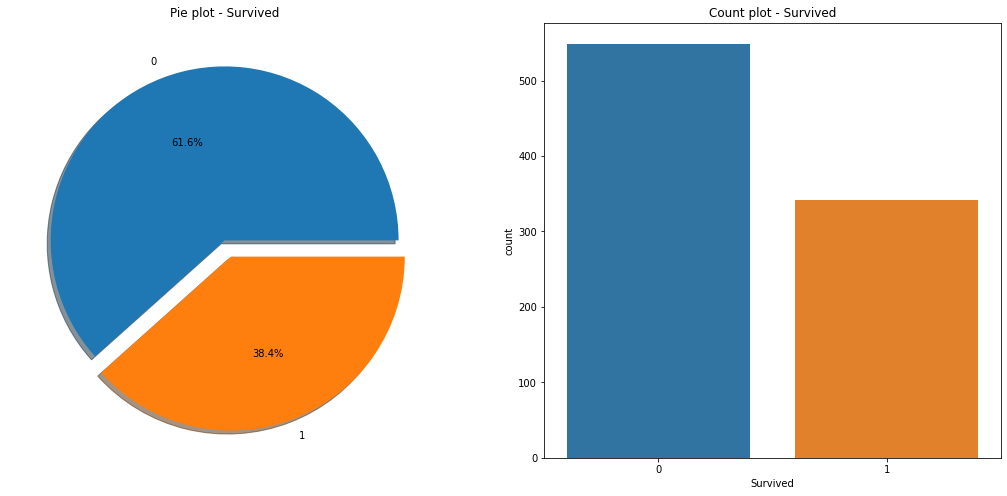

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [6]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

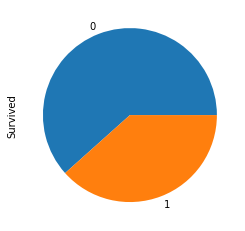

In [7]:
df_train['Survived'].value_counts().plot.pie()

## 2.1 PClass

In [8]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

# Pclass 별로 생존자가 몇명이 있는지

,Survived
Pclass,
1,216
2,184
3,491


In [9]:
# 객체가 만들어진다.
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()
df_train[['Pclass','Survived']].groupby(['Pclass']).count()
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
print(pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True))
print()
print(pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=False))

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [11]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

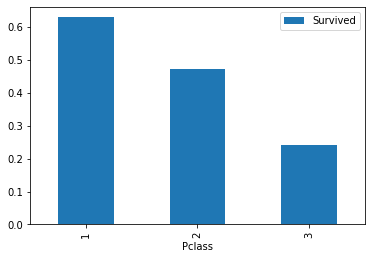

In [12]:
# 각 Pclass 별로 생존률을 보여준다
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


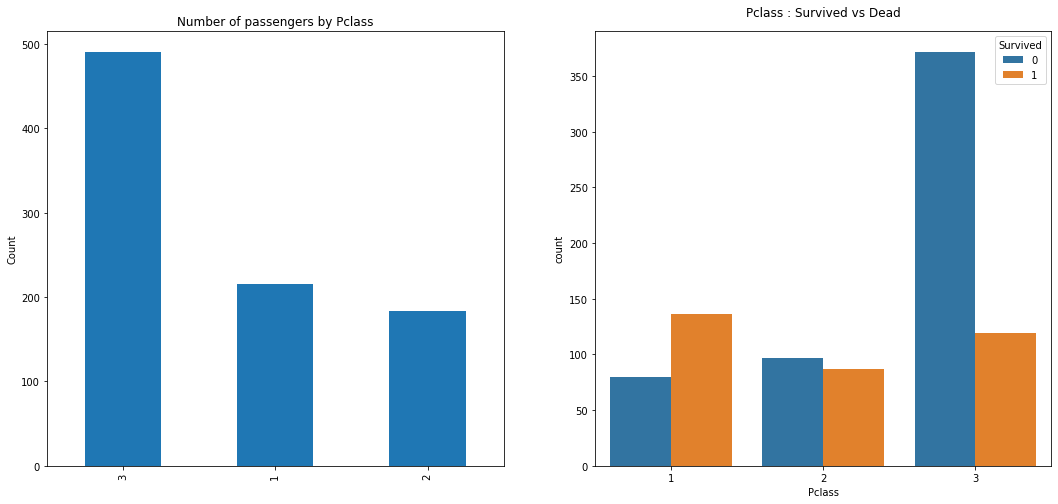

In [13]:
y_position=1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("Number of passengers by Pclass")
ax[0].set_ylabel("Count")

sns.countplot("Pclass", hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Pclass : Survived vs Dead", y=y_position)
plt.show()

## 2.2 성별 관련하여 생존자 확인하기

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


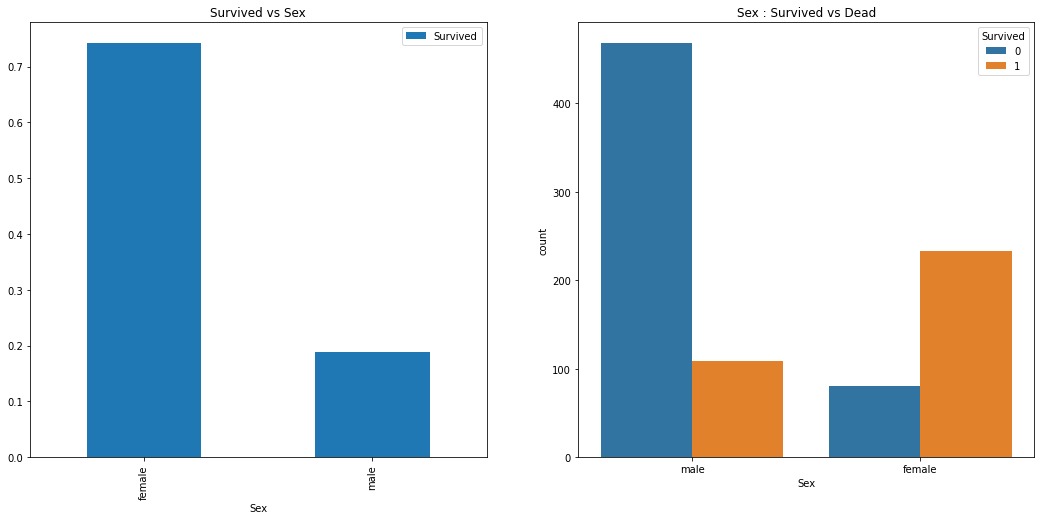

In [14]:
f, ax = plt.subplots(1,2,  figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [15]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
pd.crosstab(df_train['Sex'],df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


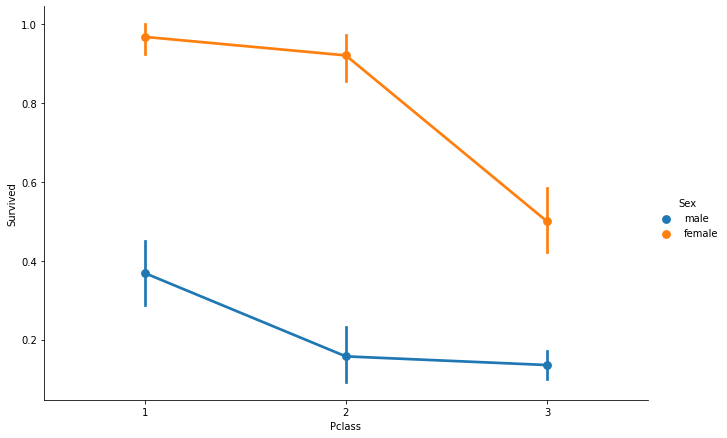

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

## Age

In [20]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
print("제일 나이 많은 탑승객 : {:.1f} years".format(df_train['Age'].max()))
print("제일 어린 탑승객 \t : {:.1f} years".format(min(df_train['Age'])))
print("탑승객 평균 나이 : {:.1f} years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 	 : 0.4 years
탑승객 평균 나이 : 29.7 years


Kdeplot 은 데이터의 밀도를 나타낸다

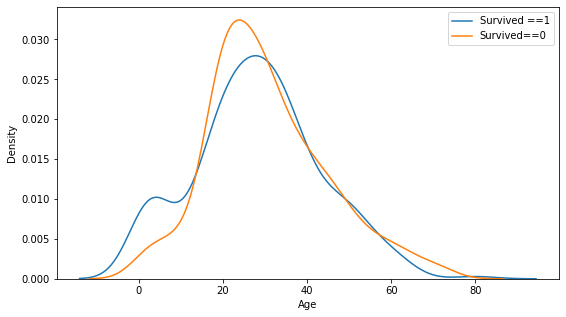

In [26]:
f, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived ==1', 'Survived==0'])
plt.show()

In [29]:
f = plt.figure(figsize=(10,10))

f, ax = plt.subplots(1,1 figsize=(10,10))

plt.figure(figsize=(10,10))

SyntaxError: invalid syntax (<ipython-input-29-73383bba2cfb>, line 3)

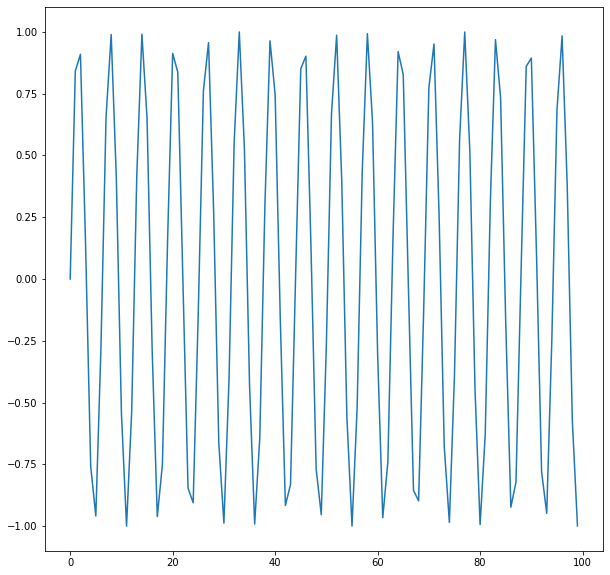

In [28]:
f, ax = plt.subplots(1,1, figsize=(10,10))
a=np.arange(100)
b=np.sin(a)
plt.plot(b)

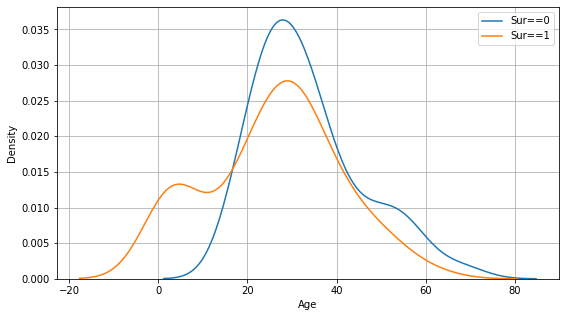

In [31]:
f, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass'] ==2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax=ax)
plt.legend(['Sur==0', 'Sur==1'])
plt.grid()
plt.show()

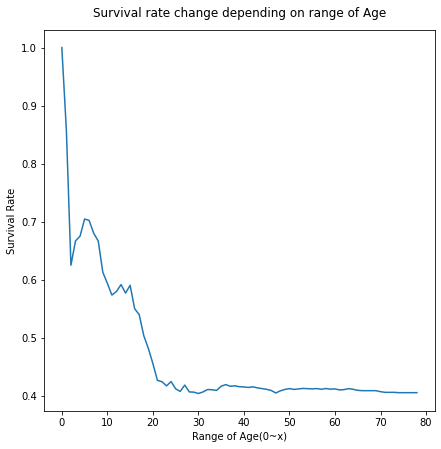

In [43]:
# 함수로 만들기
# 연령별 생존률
change_age_range_survival_ratio=[]

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title("Survival rate change depending on range of Age",y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel("Range of Age(0~x)")
plt.show()

## Pclass, Sex, Age

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


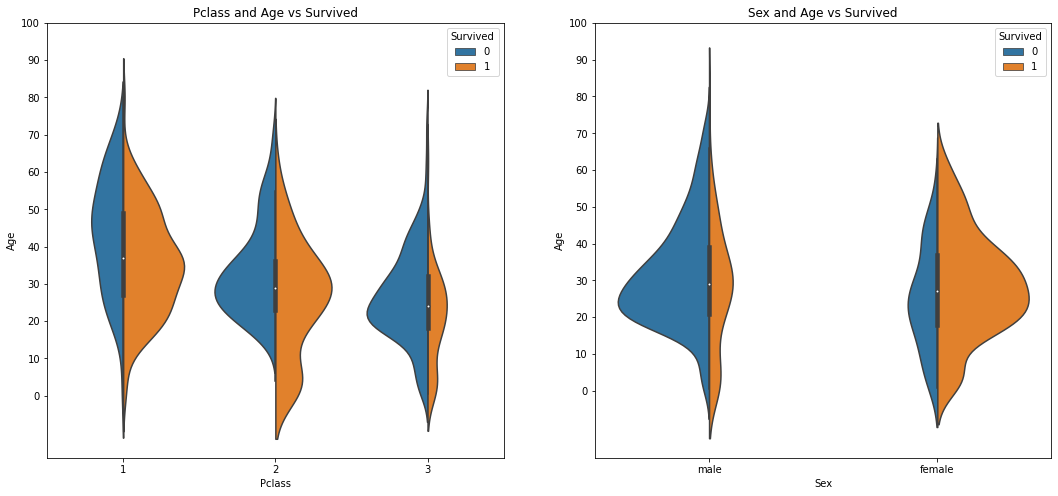

In [46]:
f, ax= plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))


sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked

<AxesSubplot:xlabel='Embarked'>

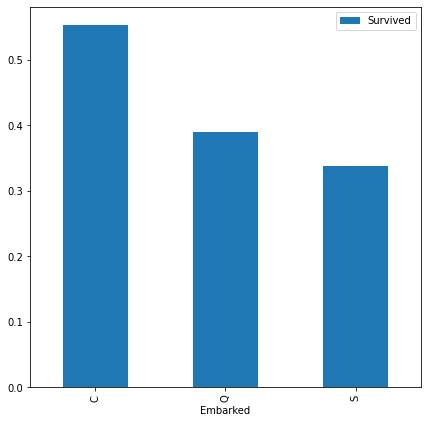

In [47]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

## Family - SibSp + Parch

In [48]:
# FamilySize Column 추가
df_train['FamilySize']=df_train['SibSp']+df_train['Parch'] +1

In [50]:
print("Maximum size of Family :", df_train['FamilySize'].max())
print("Minimum size of Family :", df_train['FamilySize'].min())


Maximum size of Family : 11
Minimum size of Family : 1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


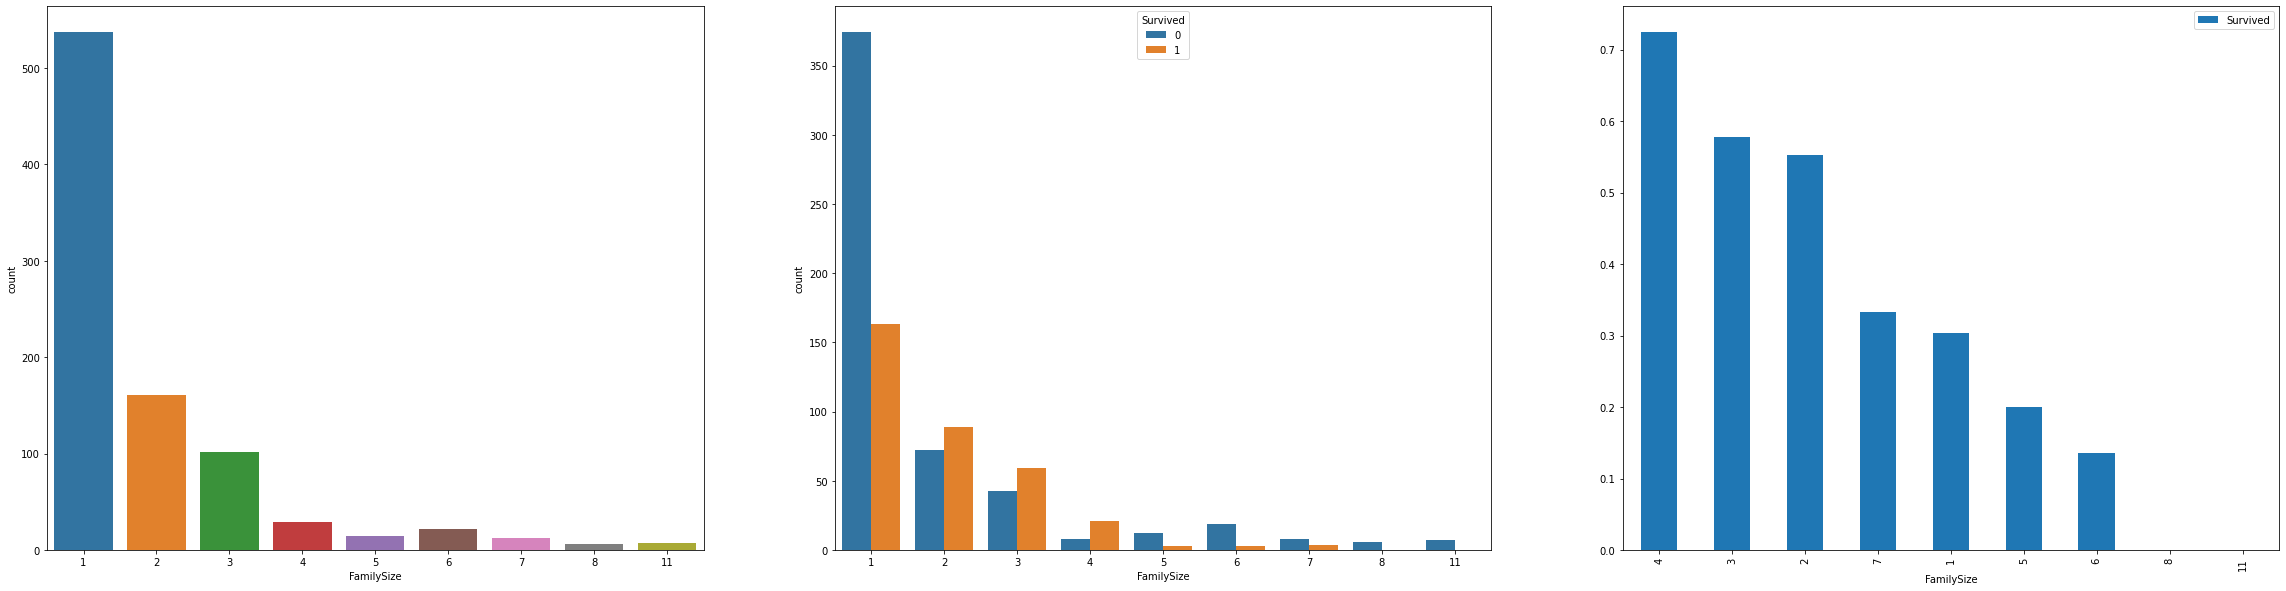

In [52]:
f, ax= plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
plt.show()